In [1]:
import Modules.SQcircuit_extensions as sq_ext
import Modules.figures as figs
import SQcircuit as sq
import numpy as np
import matplotlib.pyplot as plt
import importlib

%matplotlib ipympl
plt.rcParams['text.usetex'] = False
importlib.reload(sq_ext)
importlib.reload(sq)
importlib.reload(figs)
np.set_printoptions(linewidth=200, formatter={'float': '{:.3e}'.format})
# np.set_printoptions(linewidth=200, formatter={'float': '{:.1f}'.format})

In [2]:
# Fundamental constants
h   = 6.62607015e-34
e0  = 1.602176634e-19
Φ_0 = h/(2*e0)

In [3]:
GHz = 1e9
fF  = 1e-15
nH  = 1e-9

In [4]:
# Circuit parameters
Csh = 15
C   = 15
Cg  = 10
CJ  = 3
Lq  = 25
Lr  = 10
Δ   = 0.1
EJ  = 10.0
l = Lq*(Lq+4*Lr) - 4*Δ**2

In [5]:
Cf = C/2 + Csh + CJ
Lf = l/(Lq+4*Lr)
C_f = Cf * fF
L_f = Lf * nH
Z_f = np.sqrt(L_f/C_f)

L_r = l/Lq * nH
C_r = C/2 * fF
Z_r = np.sqrt(L_r/C_r)

In [6]:
L_q = l / (Lq + 4*Lr) * nH
E_J = EJ * GHz

In [7]:
E_L_f = (Φ_0/(2*np.pi))**2/L_q / h
E_C_f = e0**2 / (2*C_f) / h

In [8]:
print(E_L_f/GHz, E_C_f/GHz, E_J/GHz)

6.53862146295341 0.7596168362611421 10.0


In [48]:
fluxonium_qutrit = sq_ext.KIT_fluxonium(φ_ext=0)

In [50]:
fluxonium_qutrit.diag(6)
fluxonium_qutrit.efreqs[1:]-fluxonium_qutrit.efreqs[:-1]

array([9.559e+00, 9.081e+00, 8.592e+00, 8.095e+00, 7.598e+00])

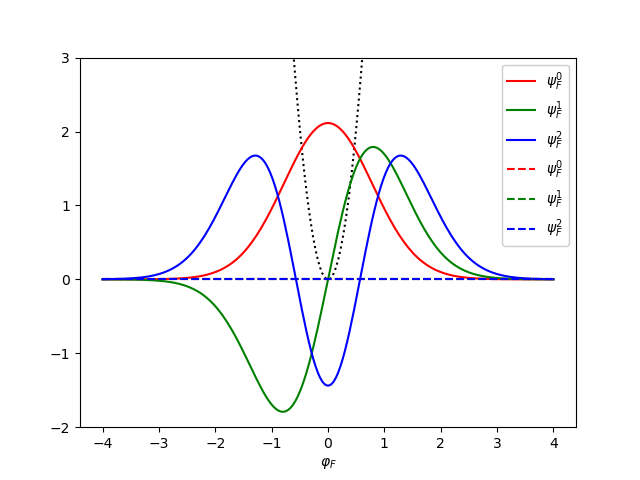

In [43]:
φ_f = np.linspace(-4,4,200)
# φ_ext = np.pi
φ_ext = 0
V_f = 0.5 * E_L_f * (φ_f)**2 - E_J * np.cos(φ_f-φ_ext)

n_eig = 3
_, _ = fluxonium_qutrit.diag(n_eig, real=True)
states_f = [fluxonium_qutrit.eig_phase_coord(k=i, grid=[φ_f/2/np.pi]) for i in range(n_eig)]
# states_f = [fluxonium_qutrit.eig_phase_coord(k=i, grid=[φ_f]) for i in range(n_eig)]
labels_f = [r'$\psi_F^0$', r'$\psi_F^1$', r'$\psi_F^2$']
colors_f = ['r', 'g', 'b']
fig, ax_f = plt.subplots()

ax_f.plot(φ_f, (V_f-V_f.min())/GHz, 'k:')#, label = r'$\frac{1}{2}E_{L_{F}}\varphi_F^2 - E_J\cos(\varphi_F-\varphi_{ext})$')
# [ax_f.plot(φ_f, np.abs(state)**2, label = label) for state, label in zip(states_f, labels_f)]
[ax_f.plot(φ_f, np.real(state), label = label, color=color) for state, label, color in zip(states_f, labels_f, colors_f)]
[ax_f.plot(φ_f, np.imag(state), '--', label = label, color=color) for state, label, color in zip(states_f, labels_f, colors_f)]
ax_f.set_ylim([-2,3])
# ax_f.set_xlim([-4,4])
ax_f.set_xlabel(r'$\varphi_F$')
ax_f.legend(loc=1, framealpha=1)

fig.show()

In [44]:
fluxonium_qutrit = sq_ext.KIT_fluxonium_no_JJ()

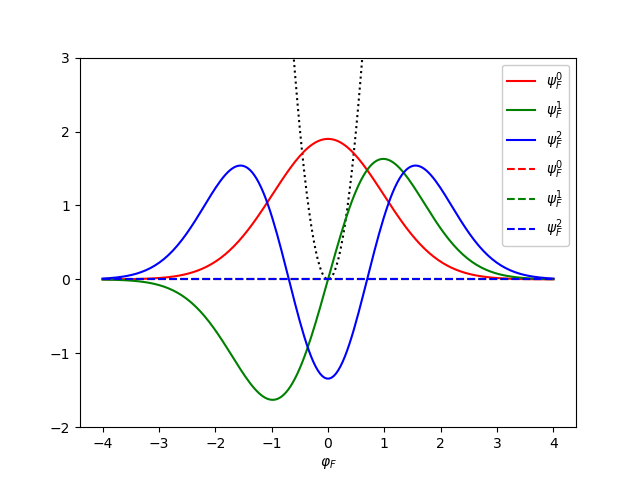

In [45]:
φ_f = np.linspace(-4,4,200)
# φ_ext = np.pi
φ_ext = 0
V_f = 0.5 * E_L_f * (φ_f)**2 - E_J * np.cos(φ_f-φ_ext)

n_eig = 3
_, _ = fluxonium_qutrit.diag(n_eig, real=True)
states_f = [fluxonium_qutrit.eig_phase_coord(k=i, grid=[φ_f/2/np.pi]) for i in range(n_eig)]
# states_f = [fluxonium_qutrit.eig_phase_coord(k=i, grid=[φ_f]) for i in range(n_eig)]
labels_f = [r'$\psi_F^0$', r'$\psi_F^1$', r'$\psi_F^2$']
colors_f = ['r', 'g', 'b']
fig, ax_f = plt.subplots()

ax_f.plot(φ_f, (V_f-V_f.min())/GHz, 'k:')#, label = r'$\frac{1}{2}E_{L_{F}}\varphi_F^2 - E_J\cos(\varphi_F-\varphi_{ext})$')
# [ax_f.plot(φ_f, np.abs(state)**2, label = label) for state, label in zip(states_f, labels_f)]
[ax_f.plot(φ_f, np.real(state), label = label, color=color) for state, label, color in zip(states_f, labels_f, colors_f)]
[ax_f.plot(φ_f, np.imag(state), '--', label = label, color=color) for state, label, color in zip(states_f, labels_f, colors_f)]
ax_f.set_ylim([-2,3])
# ax_f.set_xlim([-4,4])
ax_f.set_xlabel(r'$\varphi_F$')
ax_f.legend(loc=1, framealpha=1)

fig.show()